In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [11]:
df = pd.read_csv("Amazon_Full_data.csv")

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [13]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [15]:
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

# Data Cleaning

In [6]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [7]:
df=df.dropna(how='all')
df.isnull().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [8]:
error= df[df['Quantity Ordered']=='Quantity Ordered']

In [9]:
error

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [10]:
#True  for rows where Order ID is NOT "Order ID"
#False for rows where Order ID IS "Order ID"
df= df[df['Quantity Ordered']!='Quantity Ordered']

In [11]:
df1=df[df['Quantity Ordered']=='Quantity Ordered']

In [12]:
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [13]:
df['Quantity Ordered']= pd.to_numeric(df['Quantity Ordered'])
df['Price Each']= pd.to_numeric(df['Price Each'])
df['Order Date']=pd.to_datetime(df['Order Date'])
df.info()

C:\Users\EKTA SINGH\AppData\Local\Temp\ipykernel_24700\2969468698.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date']=pd.to_datetime(df['Order Date'])


<class 'pandas.core.frame.DataFrame'>
Index: 185950 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order ID          185950 non-null  object        
 1   Product           185950 non-null  object        
 2   Quantity Ordered  185950 non-null  int64         
 3   Price Each        185950 non-null  float64       
 4   Order Date        185950 non-null  datetime64[ns]
 5   Purchase Address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 9.9+ MB


# Feature Engineering

### Adding Total Sales column by multiplying Quantity Ordered * Price Each

In [15]:
df['Total Sales']=df['Quantity Ordered']*df['Price Each'] 

## Extracting month from Order Date

In [16]:
df['Month']= df['Order Date'].dt.month

## Making New Column For city by extracting city name and state name and adding them into the new column

In [17]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City']= df['Purchase Address'].apply(lambda x:get_city(x)+' '+ get_state(x))

# Data Visualisation

## Which Product Made The Highest Sales?

In [19]:
grp= df.groupby(df['Product'],as_index=False)['Total Sales'].sum().sort_values(by='Total Sales', ascending= False).head(10)

Text(0.5, 1.0, 'Product by Total Sales')

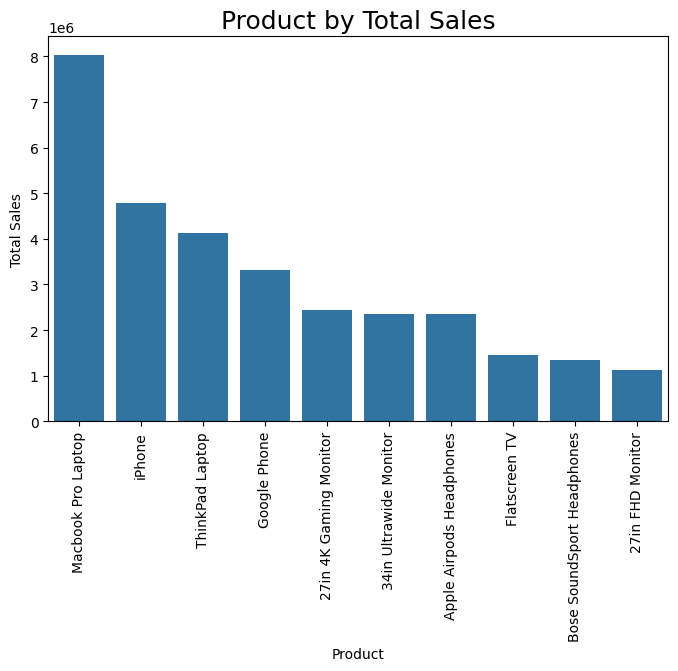

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data= grp, x='Product', y='Total Sales')
plt.xticks(rotation=90)
plt.title('Product by Total Sales', size=18)

#### Macbook Pro Laptop Made the highest sale

## Which City Made Highest Sale?

In [21]:
grp =df.groupby(df['City'],as_index=False)['Total Sales'].sum().sort_values(by= 'Total Sales', ascending= False).head(10)

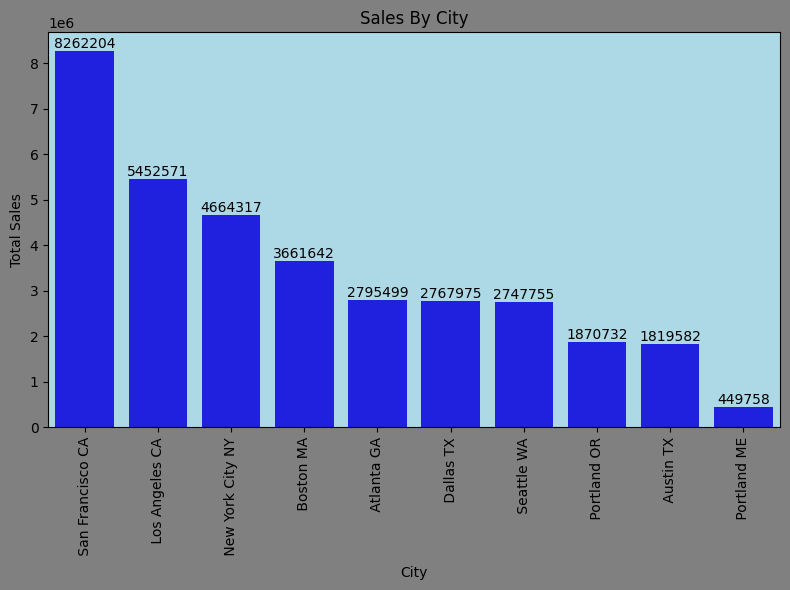

In [22]:
plt.figure(figsize=(8,6),facecolor='grey')
ax=sns.barplot(data=grp,x='City',y='Total Sales',color='blue')
ax.bar_label(ax.containers[0],fmt='%0.0f',fontweight='light', color='black')
ax.set_facecolor('lightblue')
plt.xticks(rotation=90)
plt.title('Sales By City')
plt.tight_layout()

## San Francisco Made The Highest Sales

# Which Month Made The Highest Sales?

#### Type 1: Barplot 

In [23]:
grp= df.groupby(df['Month'],as_index=False)['Total Sales'].sum().sort_values(by='Total Sales', ascending= False)

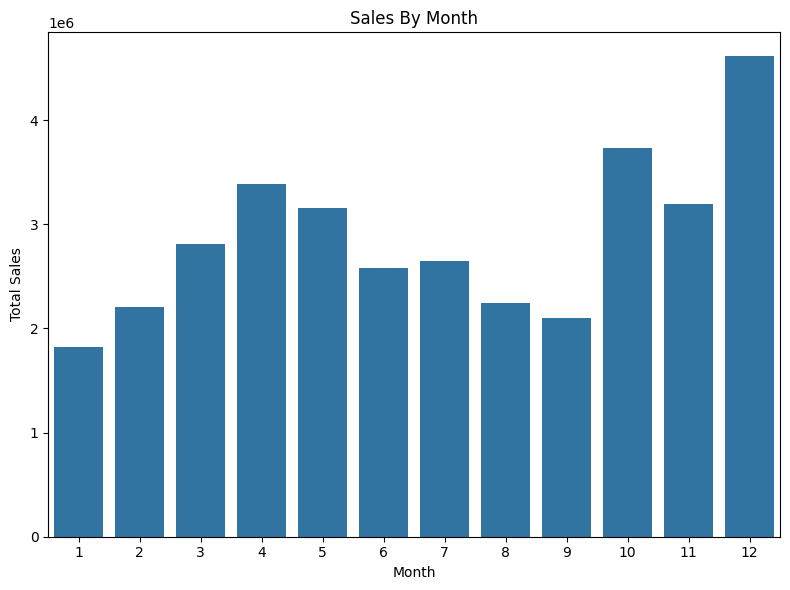

In [24]:
plt.figure(figsize=(8,6))
sns.barplot(data=grp,x='Month',y='Total Sales')
plt.title('Sales By Month')
plt.tight_layout()

#### Type 2:Lineplot

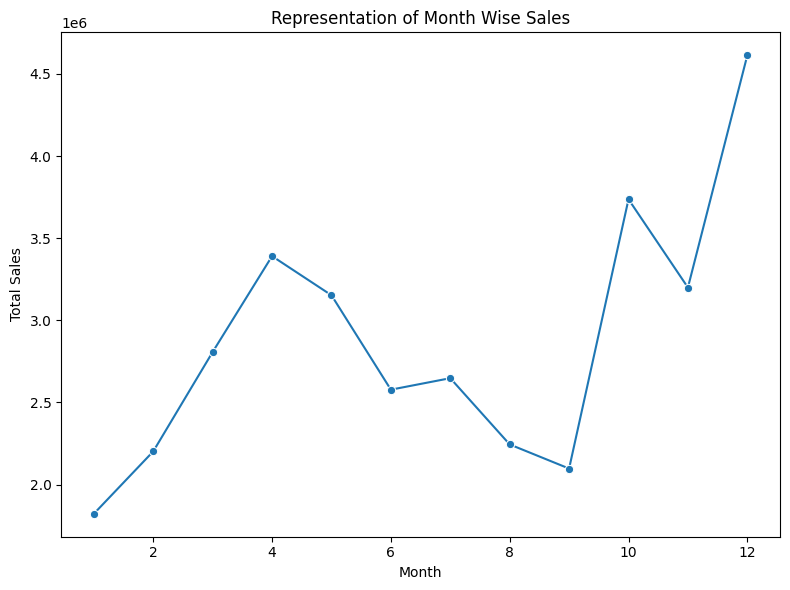

In [25]:
plt.figure(figsize=(8,6))
sns.lineplot(data=grp,x='Month',y='Total Sales',marker='o')
plt.title('Representation of Month Wise Sales')
plt.tight_layout()

#### Type 3: Pie chart (not recommended)

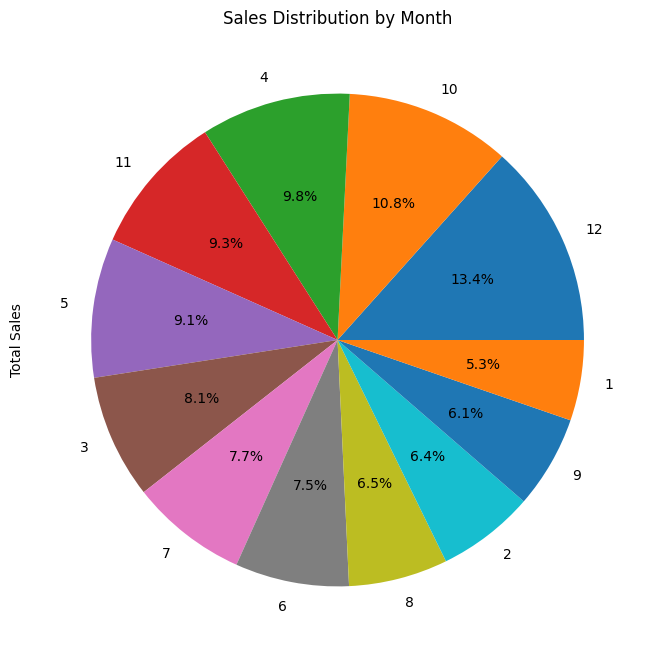

In [26]:
grp.set_index('Month')['Total Sales'].plot.pie(autopct='%1.1f%%', figsize=(8,8))
plt.title('Sales Distribution by Month')
plt.show()

## December (12th Month of the year) Made The Highest Sale

# Which Product is Sold the most?

In [27]:
groupby=df.groupby('Product',as_index=False)['Quantity Ordered'].sum().sort_values(by='Quantity Ordered',ascending=False).head(10)

Text(0.5, 1.0, 'Top 10 Sold Products')

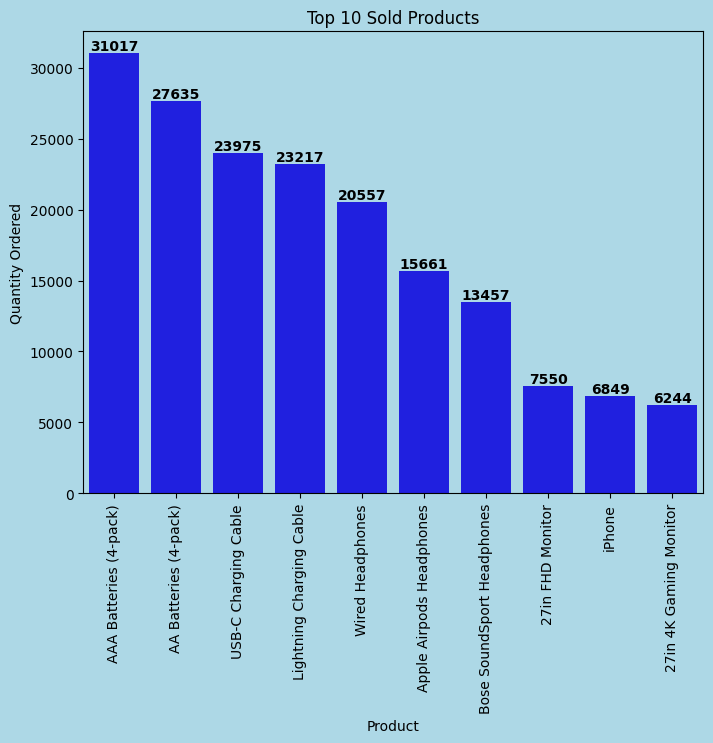

In [28]:
plt.figure(figsize=(8,6),facecolor='lightblue')
ax=sns.barplot(data=groupby,x='Product',y='Quantity Ordered',color='blue')
ax.bar_label(ax.containers[0],fmt='%0.0f',fontweight='bold',color='black')
ax.set_facecolor('lightblue')
plt.xticks(rotation=90)
plt.title("Top 10 Sold Products")

## AAA Batteries(4-Pack) has been ordered the most

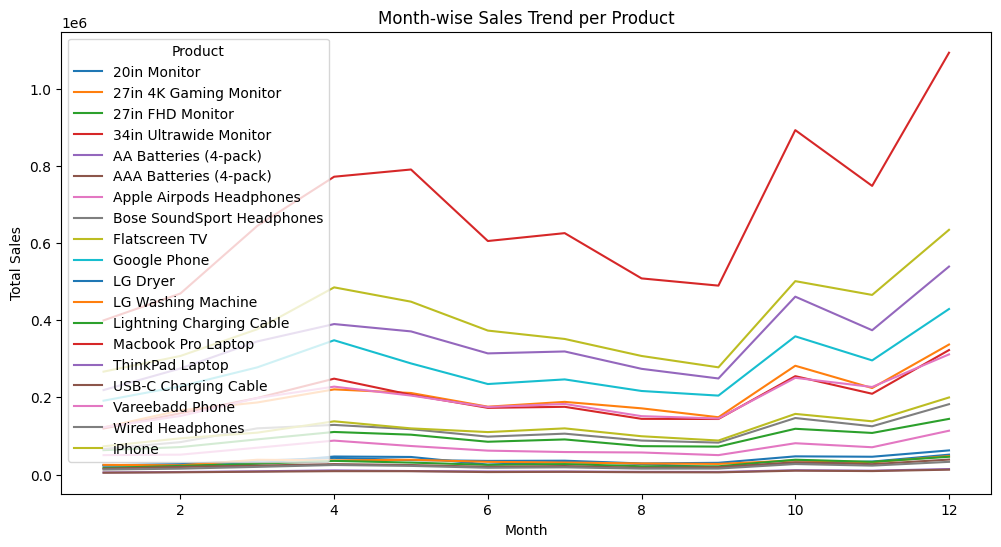

In [29]:
top_products = df.groupby(['Month','Product'])['Total Sales'].sum().reset_index()
top_products_pivot = top_products.pivot(index='Month', columns='Product', values='Total Sales')
top_products_pivot.plot(figsize=(12,6))
plt.title('Month-wise Sales Trend per Product')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()
#pivot() → Reshapes the DataFrame from long format to wide format.

## November or December → High sales during festivals/holiday season. The products whose lines stay higher on the graph have:consistently high sales strong demand across the year.